# SkyFusion Data Analysis 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from src.datasets import SkyFusionDataset
from src.transforms import ImageTransforms, MinPointAndSizeBBox
from src.visualizations import ImageVisualizations

In [3]:
train_ds = SkyFusionDataset(split="train")
category_names = train_ds.category_names
print("Categories:", category_names)
print(f"Train dataset length: {len(train_ds)}")

Categories: {0: 'aircraft', 1: 'ship', 2: 'vehicle'}
Train dataset length: 2094


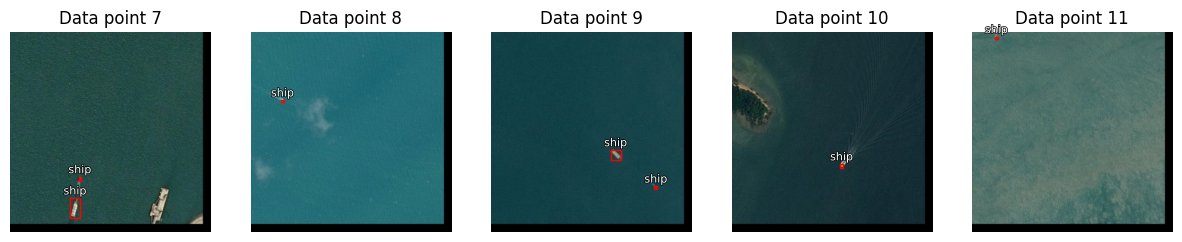

In [4]:
plots_range = range(7, 12)
plots_range_len = len(plots_range)
plt.figure(figsize=(15, 10))
for idx, plot_idx in enumerate(plots_range, start=1):
    img, annots = train_ds[plot_idx]
    
    img = ImageTransforms.postprocess(img)
    categories = [category_names[int(category_id)] for category_id in annots[:, 0]]
    bboxes = list(map(MinPointAndSizeBBox.postprocess, annots[:, 1:5]))
        
    plt.subplot(1, plots_range_len, idx)
    plt.title(f"Data point {plot_idx}")
    ImageVisualizations.plot_image_with_annotations(img, bboxes, categories)
plt.show()